<a href="https://colab.research.google.com/github/CORA-33/CORA-33/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**配置环境**

In [ ]:
!sudo apt install tesseract-ocr libtesseract-dev
!pip -q install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,560 kB of archives.
After this operation, 31.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.1 [582 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:5 http://arc

In [ ]:
!wget https://nanonets.com/blog/content/images/2019/12/invoice-sample.jpg -O image.jpg
!wget https://nanonets.com/blog/content/images/2019/12/greek-thai.png

--2024-09-24 08:42:25--  https://nanonets.com/blog/content/images/2019/12/invoice-sample.jpg
Resolving nanonets.com (nanonets.com)... 13.35.166.88, 13.35.166.102, 13.35.166.72, ...
Connecting to nanonets.com (nanonets.com)|13.35.166.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69157 (68K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]  67.54K  --.-KB/s    in 0.007s  

2024-09-24 08:42:25 (9.53 MB/s) - ‘image.jpg’ saved [69157/69157]

--2024-09-24 08:42:26--  https://nanonets.com/blog/content/images/2019/12/greek-thai.png
Resolving nanonets.com (nanonets.com)... 13.35.166.88, 13.35.166.102, 13.35.166.72, ...
Connecting to nanonets.com (nanonets.com)|13.35.166.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63914 (62K) [image/png]
Saving to: ‘greek-thai.png’

greek-thai.png      100%[===================>]  62.42K  --.-KB/s    in 0.03s   

2024-09-24 08:42:26 (1.78 MB/s) - ‘greek-thai.png’ sa

In [ ]:
import cv2
import pytesseract

img = cv2.imread('image.jpg')

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'http://mrsinvoice.com\nI 7\nYour Company LLC Address 123, State, My Country P 111-222-333, F 111-222-334\nBILL TO:\nP: 111-222-333, F: 111-222-334 a. z\ncient@eromplent\nContact Phone 101-102-103\njohn Doe office ayment Terms ‘ash on Delivery\nOffice Road 38\nP: 111-333-222, F: 122-222-334 Amount Due: $4,170\noffice@example.net\nNO PRODUCTS / SERVICE QUANTITY / RATE / UNIT AMOUNT\nHOURS: PRICE\n1 aye 2 $20 $40\n2 | Steering Wheel 5 $10 $50\n3 | Engine oil 10 $15 $150\n4 | Brake Pad 24 $1000 $2,400\nSubtotal $275\nTax (10%) $27.5\nGrand Total $302.5\n‘THANK YOU FOR YOUR BUSINESS\n\x0c'

**图像预处理**

In [ ]:
import cv2
import numpy as np

img = cv2.imread('/content/1.jpg')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [ ]:
image = cv2.imread('/content/1.jpg')
import numpy as np
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

In [ ]:

from google.colab.patches import cv2_imshow

**ocr处理**

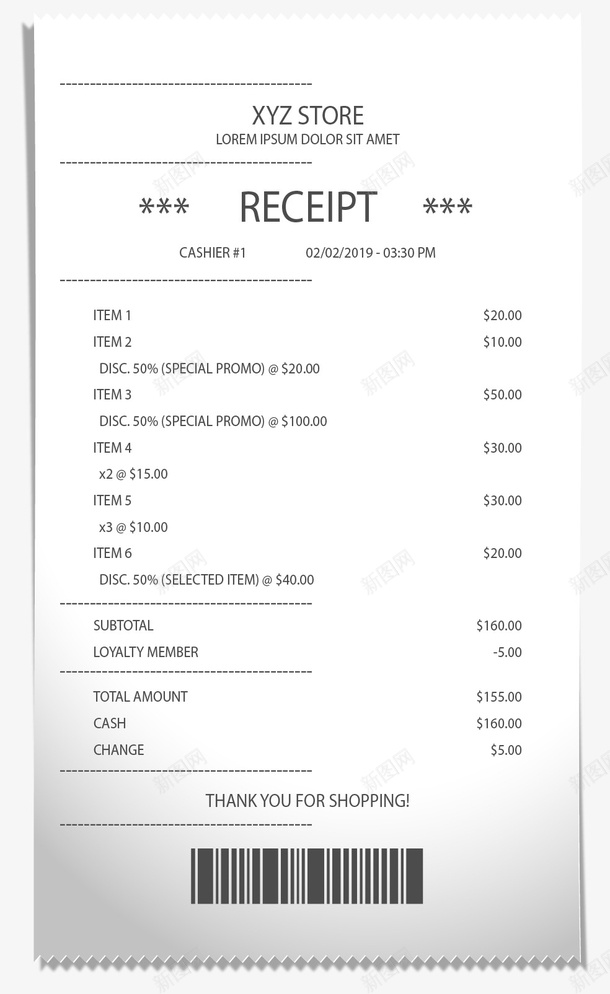

'XYZ STORE\nLOREM IPSUM DOLOR SIT AMET\nxxx RECEIPT ###\nCASHIER #1 02/02/2019 - 03:30 PM\nITEM1 $20.00\nITEM2 $10.00\nDISC. 50% (SPECIAL PROMO) @ $20.00\nTeM3 $50.00\nDISC. 50% (SPECIAL PROMO) @ $100.00\nITEM 4 $30.00\nx2.@ $15.00\nITEMS $30.00\nx3 @ $10.00\nITEM6, $20.00\nDISC. 50% (SELECTED ITEM) @ $40.00\nSUBTOTAL $160.00\nLOYALTY MEMBER 5.00\nTOTAL AMOUNT $155.00\nCASH $160.00\nCHANGE $5.00\nTHANK YOU FOR SHOPPING!\n\x0c'

In [ ]:
img = gray
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

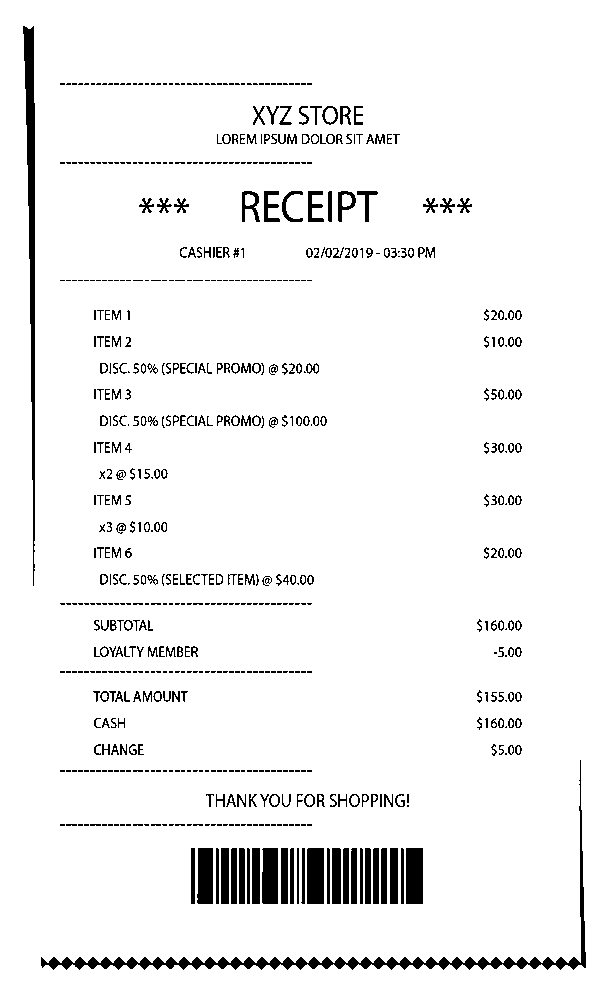

'XYZ STORE\nLOREM IPSUM DOLOR SIT AMET\nxxx RECEIPT +\nCASHIER #1 02/02/2019 - 03:30 PM\nITEM 1 $20.00\nITEM 2 $10.00\nDISC. $0% (SPECIAL PROMO) @ $20.00\nTTem3 $50.00\nDISC. 503% (SPECIAL PROMO} @ $100.00\nITEM 4 $30.00\nx2. @ $15.00\nITEMS $30.00\nx3 @ $10.00\nITEM 6, $20.00\nDISC. 50% (SELECTED ITEM} @ $40.00\nSUBTOTAL $160.00\nLOYALTY MEMBER “5.00\nTOTAL AMOUNT $155.00\nCASH $160.00\nCHANGE $5.00\nTHANK YOU FOR SHOPPING!\n\x0c'

In [ ]:
img = thresh
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

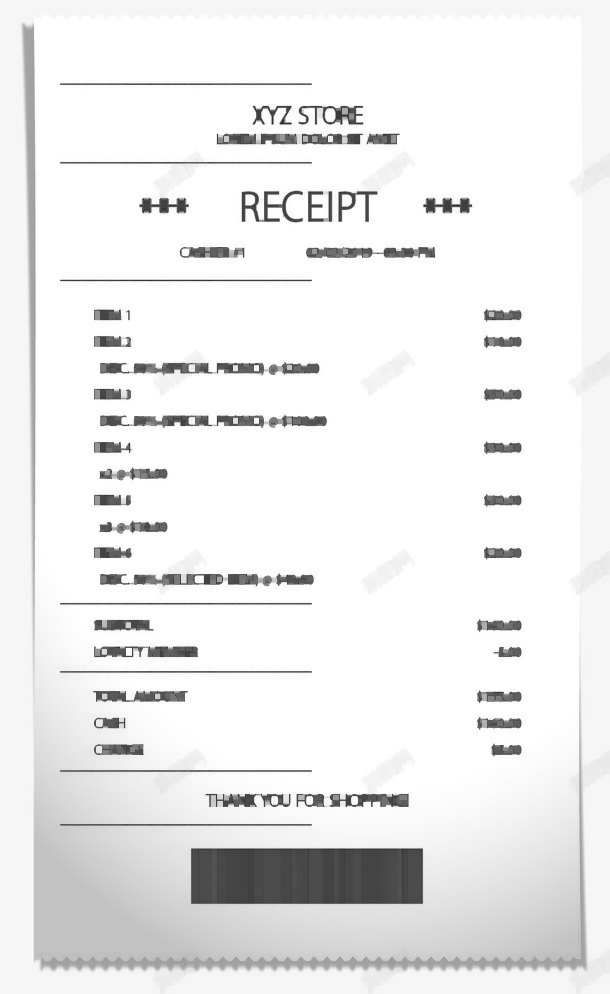

'XYZ STORE\nLO PRR OO AO\nwee RECEIPT +\nCar OR em\nm1 ome\n2 ee\nSC. SSP PACD @- aD\nom 2\nOC APEC PRC) o-foD\nomas ma\nuote\nims se\nae fen\nis one\nSC LACIE © ame\noT ro\nRCT aR 1\nTO aT om\nom rose\na 2\nTHARECYOU FOR SHOPPE\n\x0c'

In [ ]:
img = opening
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

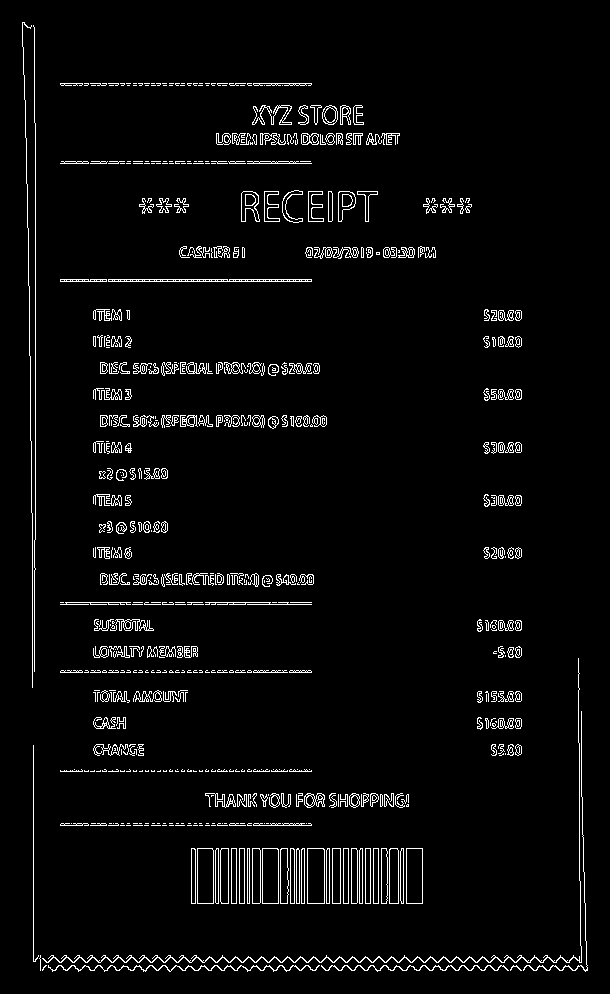

'XYZ STORE\nLORE IPSUM DOLOR SIT AMET\nSe @c ee\nfensucotly fer oye russe aay\n\ncen Esato)\nPy Spc)\nDISC S07 (SPEGAL PROMS) © $20.09,\ney BS tutst0)\nepsietcier sical meme es vou)\naa’ $30.80\nPeOe TEN)\nOe $3000\nPelOeD cho)\nOse) BP not\noiSees Oey CMa ON eM Ono}\nSUSTOTAL SiéheD\nfeeh SMa rettcl acy Sic)\nSoe ol NTE ETEStstiy\nce Sieheo\nCHANGE $360\n\nTHANK YOU FOR SHOPPING!\n\nDEOL ROLOOOOCOOOOOOOOOOOOEOOOORN\n\x0c'

In [ ]:
img = canny
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

In [ ]:
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('/content/1.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


**文本加框线**

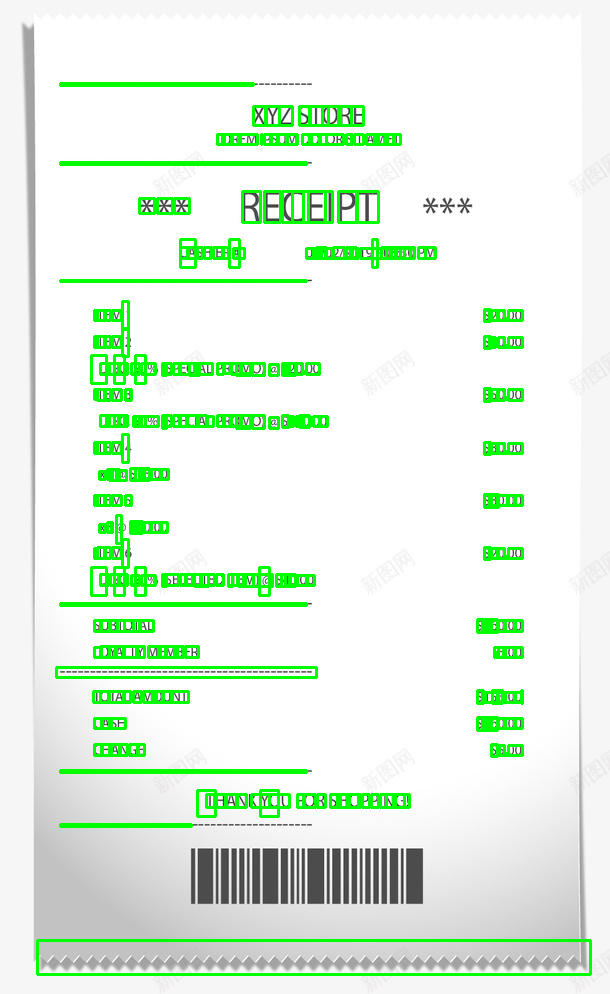

-1

In [ ]:
import cv2
import pytesseract

img = cv2.imread('/content/1.jpg')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow( img)
cv2.waitKey(0)

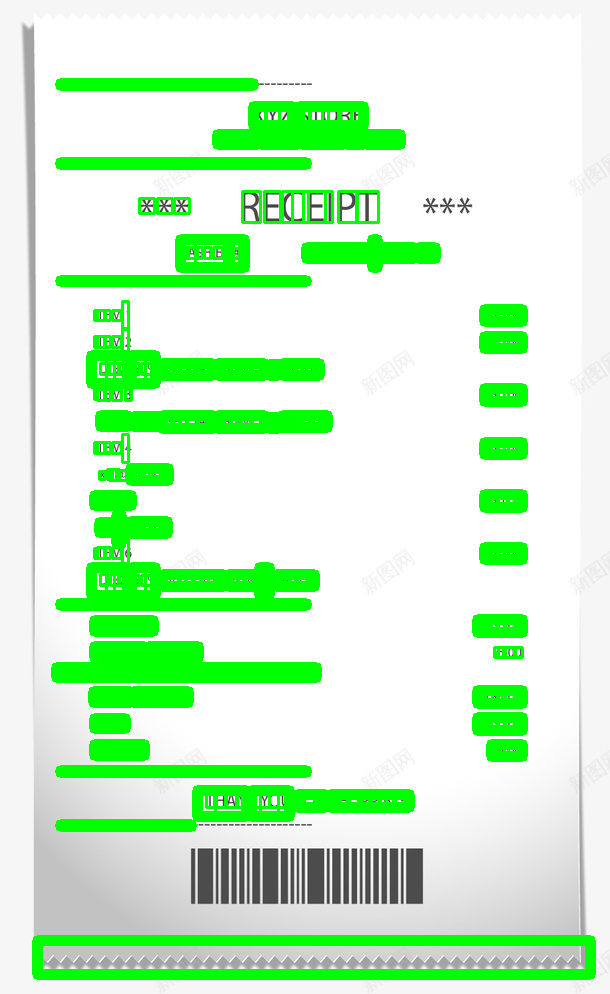

-1

In [ ]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

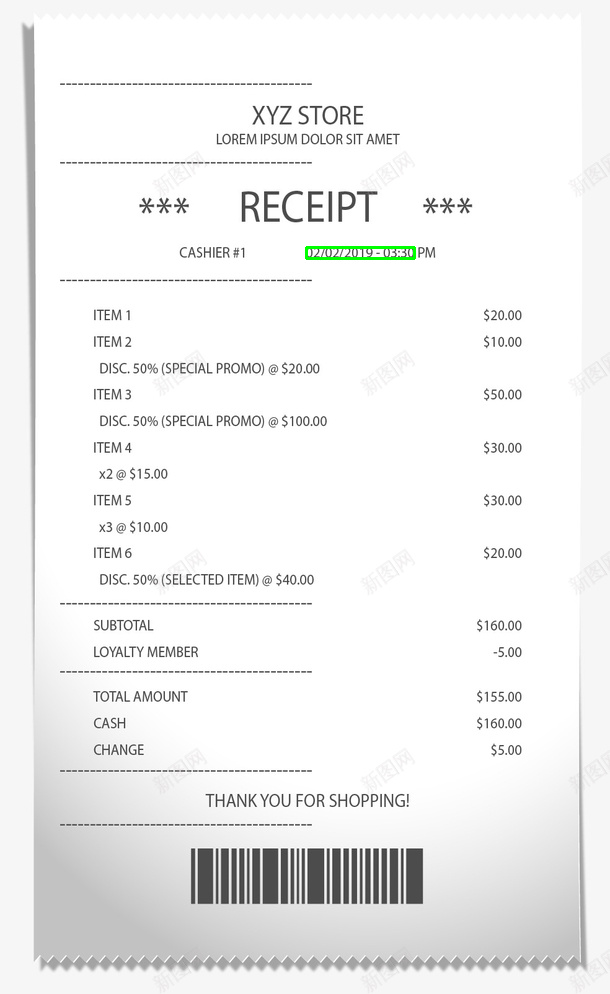

-1

In [ ]:
import re
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('/content/1.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow( img)
cv2.waitKey(0)

In [ ]:
custom_config = r'--oem 3 --psm 6 outputbase digits'
print(pytesseract.image_to_string(img, config=custom_config))

2
41 -
1 20.00
2 10.00
.50420.00
3 50.00
.5090100.00
4 30.00
2.15.00
5 30.00
310.00
6 20.00
.50940.00
160.00
-5.00
155.00
160.00
5.00



In [ ]:
custom_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'XYZ STORE\nLOREM IPSUM DOLOR SIT AMET\nxxx RECEIPT ###\nCASHIER # CoO=TDPM\nITEMT $.O\nITEMZ $.O\nDISC. % (SPECIAL PROMO) @ $.\nITEM $.O\nDISC. $% (SPECIAL PROMO) @ $.O\nITEM $.O\nx.@ $S.O\nITEMS $.O\nx @ $.O\nITEMé, $.O\nDISC. S% (SELECTED ITEM) @ $.O\n‘SUBTOTAL $.O\nLOYALTY MEMBER -$.O\nTOTAL AMOUNT $SS.O\nCASH $.O\nCHANGE $S.O\nTHANK YOU FOR SHOPPING!\n\x0c'

In [ ]:
!tesseract --list-langs

List of available languages (2):
eng
osd


In [ ]:
custom_config = r'-l eng --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'XYZ STORE\nLOREM IPSUM DOLOR SIT AMET\nxxx RECEIPT ###\nCASHIER #1 CoO=TDPM\nITEM1 $20.00\nITEM2 $10.00\nDISC. 50% (SPECIAL PROMO) @ $20.00\nITEM 3 $50.00\nDISC. 50% (SPECIAL PROMO) @ $100.00\nITEM 4 $30.00\nx2.@ $15.00\nITEMS $30.00\nx3 @ $10.00\nITEM6, $20.00\nDISC. 50% (SELECTED ITEM) @ $40.00\n‘SUBTOTAL $160.00\nLOYALTY MEMBER -5.00\nTOTAL AMOUNT $155.00\nCASH $160.00\nCHANGE $5.00\nTHANK YOU FOR SHOPPING!\n\x0c'

In [ ]:
!sudo apt-get install tesseract-ocr-grc
!sudo apt-get install tesseract-ocr-tha

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-grc
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 916 kB of archives.
After this operation, 2,261 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-grc all 1:4.00~git30-7274cfa-1.1 [916 kB]
Fetched 916 kB in 2s (471 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-grc.
(Reading databa

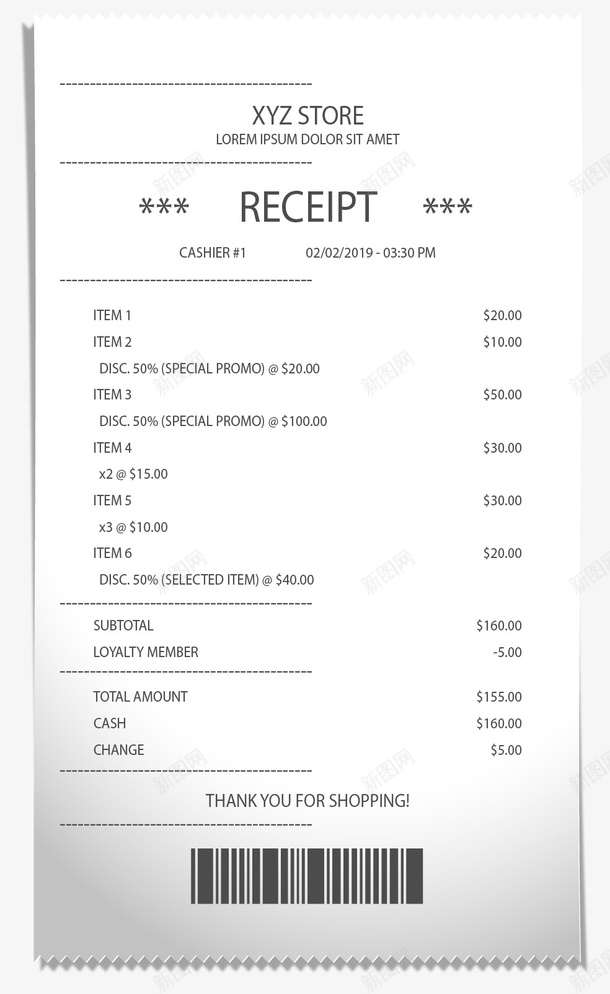

'XYZ STORE\nLOREM IPSUM DOLOR SIT AMET\nxxx RECEIPT ###\nCASHIER #1 02/02/2019 - 03:30 PM\nITEM1 $20.00\nITEM2 $10.00\nDISC. 50% (SPECIAL PROMO) @ $20.00\nก ะ ห 3 $50.00\nDISC. 50% (SPECIAL PROMO) @ $100.00\nITEM 4 $30.00\nx2.@ $15.00\nITEMS $30.00\nx3 @ $10.00\nITEM6, $20.00\nDISC. 50% (SELECTED ITEM) @ $40.00\nSUBTOTAL $160.00\nLOYALTY MEMBER 5.00\nTOTAL AMOUNT $155.00\nCASH $160.00\nCHANGE $5.00\nTHANK YOU FOR SHOPPING!\n\x0c'

In [ ]:
img = cv2.imread('/content/1.jpg')
cv2_imshow(img)
# Adding custom options
custom_config = r'-l grc+tha+eng --psm 6'
pytesseract.image_to_string(img, config=custom_config)

In [ ]:
!pip -q install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
custom_config = r'-l grc+tha+eng --psm 6'
txt = pytesseract.image_to_string(img, config=custom_config)

from langdetect import detect_langs
detect_langs(txt)

[en:0.9999966346756389]

In [ ]:
def read_text_from_image(image):
  """Reads text from an image file and outputs found text to text file"""
  # Convert the image to grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Perform OTSU Threshold
  ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

  rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

  dilation = cv2.dilate(thresh, rect_kernel, iterations = 1)

  contours, hierachy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  image_copy = image.copy()

  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    cropped = image_copy[y : y + h, x : x + w]

    file = open("results.txt", "a")

    text = pytesseract.image_to_string(cropped)

    file.write(text)
    file.write("\n")

  file.close()

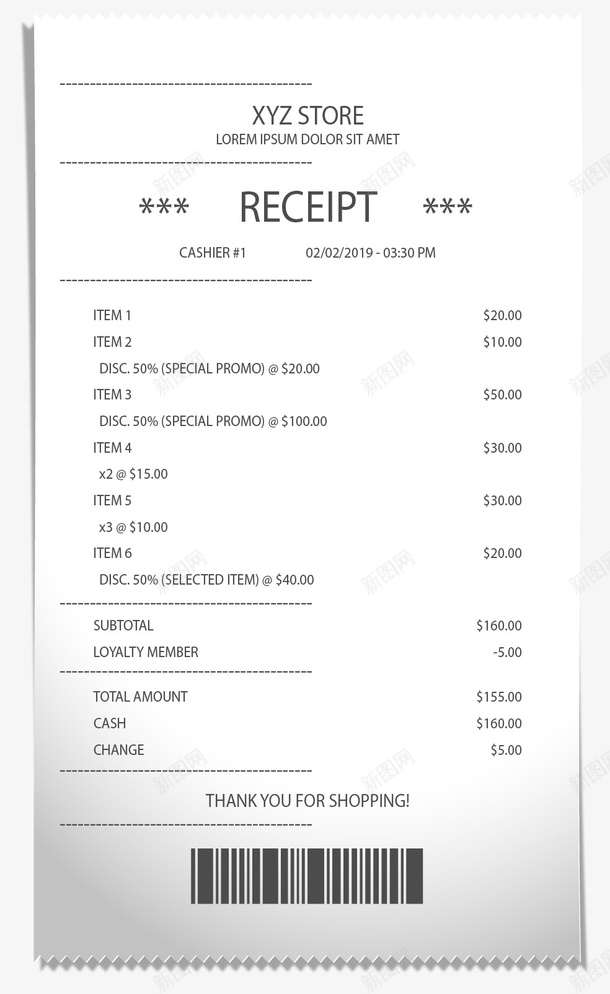







LOREM IPSUM DOLOR SIT AMET



XYZ STORE





RECEIPT



XXX



XXX



CASHIER #1



02/02/2019 - 03:30 PM





$10.00

$20.00



 



LOYALTY MEMBER

SUBTOTAL



 



DISC. 50% (SELECTED ITEM) @ $40.00



ITEM 6

x3. @ $10.00



ITEMS

x2.@ $15.00



ITEM 4

DISC. 50% (SPECIAL PROMO) @ $100.00



ITEM 3

DISC. 50% (SPECIAL PROMO) @ $20.00



ITEM 2

ITEM1



$50.00



$30.00



$30.00



$20.00



-5.00

$160.00



$5.00

$160.00

$155.00,



 



CHANGE.

CASH

TOTAL AMOUNT



 



THANK YOU FOR SHOPPING!



 



 



THANK YOU FOR SHOPPING!





In [ ]:
image = cv2.imread("/content/1.jpg")
read_text_from_image(image)

# OCR results
cv2_imshow(image)
f = open("results.txt", "r")
lines = f.readlines()
lines.reverse()
for line in lines:
    print(line)
f.close()